# Inference
For visualizing different layers output



In [0]:
from google.colab import drive
drive.mount('/content/drive')
home_dir = '/content/drive/My Drive/Colab Notebooks/FER/'
baum_dir = home_dir + "BAUM/"


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import os, glob
import pandas as pd
import numpy as np


In [0]:

# load and evaluate a saved model
model_path = os.path.join(baum_dir, 'models', 'offlineKaggle.h5')

model = load_model(model_path)
# summarize model.
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 44, 44, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d (AveragePo (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)         73856 

# Data Histogram

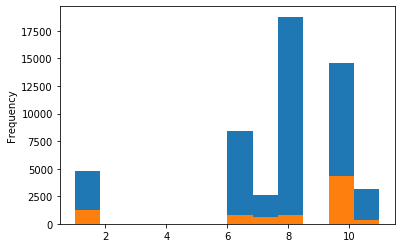

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Used Data Hist. [1, 10, 11, 6, 7, 8]
tariningData = pd.read_csv(baum_dir + 'training_data.csv')
ax2 = tariningData['code'].plot.hist(bins=12)

validationData = pd.read_csv(baum_dir + 'validation_data.csv')
ax3 = validationData['code'].plot.hist(bins=12)

In [0]:
data_labels_xl =  pd.read_excel(baum_dir +"Annotations_BAUM1s.xlsx")
data_labels = np.array(data_labels_xl)


Taking random Images from  60497 images
[[0.06864195 0.33801875 0.02858298 0.10768589 0.02533869 0.4317318 ]]
[[0.07004509 0.33678514 0.02961118 0.10925011 0.02630904 0.4279994 ]]
[[0.08845261 0.31806424 0.04507313 0.12855889 0.04096891 0.37888223]]
[[0.06796374 0.3384907  0.02808755 0.10692127 0.02488598 0.43365085]]
[[0.07281109 0.334467   0.0316959  0.11226015 0.02823097 0.42053488]]
[[0.13680832 0.23673296 0.11200359 0.16734202 0.10799859 0.23911455]]
[[0.08203186 0.3249974  0.03926493 0.12210353 0.0354569  0.39614528]]
[[0.09555899 0.3089634  0.05206702 0.13541907 0.04779492 0.3601965 ]]
[[0.07343568 0.33367354 0.03218304 0.11301058 0.02873202 0.4189651 ]]
[[0.07107297 0.3356543  0.03038063 0.11041454 0.0270462  0.42543137]]
[[0.08821101 0.31800997 0.04472547 0.12825449 0.04067424 0.38012484]]
[[0.10049248 0.3023684  0.05733332 0.13993488 0.05294425 0.3469267 ]]
[[0.08845573 0.31812963 0.04503012 0.12848125 0.04091714 0.3789861 ]]
[[0.10265309 0.29957646 0.05970239 0.14177088 0.05

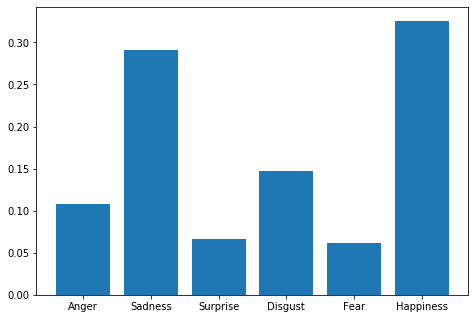

In [0]:
import cv2
import numpy as np
from glob import glob
from random import seed
from random import randint
import matplotlib.pyplot as plt

none_image = None

spatial = baum_dir + 'imgs_spatial/'

spatialImgs = glob(spatial+'*/*/*.png')
print("Taking random Images from ", len(spatialImgs), "images")

def get_emotion_code(arr):
  emotions_code_arr = [1, 10, 11, 6, 7, 8]
  result_val = max(arr)
  result = list(arr).index(result_val)
  emotions_code = emotions_code_arr[result]
  return  emotions_code


good_prediction = 0
bad_prediction = 0
i = 0
while i < 100:
  val = randint(0, len(spatialImgs))
  img = spatialImgs[val]
  sample_name =img.split('/')[-2]
  for label in data_labels:
          if label[3] == sample_name:
              emotion = label[4]
              gt_code = label[5]
              break
  #print("Ground truth for " ,sample_name , " is : ", emotion, gt_code )

  spatialImg = cv2.imread(img)
  if (not isinstance(spatialImg, type(none_image))):
    i+=1
    spatialImg = cv2.resize(spatialImg, (48,48))
    spatialImg = cv2.cvtColor(spatialImg, cv2.COLOR_BGR2RGB)
    spatialImg = spatialImg.reshape(-1, 48,48,3)

    out = model.predict([spatialImg])
    #print (out)
        
    emotions_code = get_emotion_code(out[0])
    if emotions_code == gt_code:
      good_prediction += 1
    else:
      bad_prediction += 1


print("acuuracy is: ", 100 *good_prediction/(good_prediction+bad_prediction), "%" )
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
emotions = ['Anger','Sadness', 'Surprise', 'Disgust', 'Fear', 'Happiness']
ax.bar(emotions,out[0])
plt.show()


# Visualizations

[[0.06347082 0.3421011  0.02493263 0.10176022 0.02193907 0.44579622]]
(?,)
visualization layer is :  conv2d_2


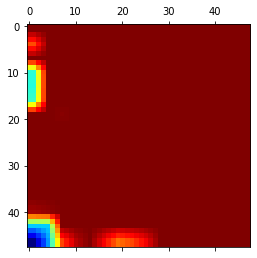

(array([[[ 44, 165,  66],
         [ 45, 166,  67],
         [ 45, 166,  67],
         ...,
         [ 44, 167,  68],
         [ 46, 169,  70],
         [ 46, 170,  70]],
 
        [[ 44, 165,  66],
         [ 45, 166,  67],
         [ 45, 166,  67],
         ...,
         [ 44, 167,  68],
         [ 46, 169,  70],
         [ 46, 169,  70]],
 
        [[ 58, 165,  66],
         [ 58, 165,  66],
         [ 53, 165,  66],
         ...,
         [ 44, 167,  68],
         [ 46, 169,  70],
         [ 46, 169,  70]],
 
        ...,
 
        [[ 16, 155, 109],
         [ 17, 156, 110],
         [ 17, 166, 113],
         ...,
         [ 40, 150,  61],
         [ 40, 150,  61],
         [ 40, 150,  61]],
 
        [[ 16, 155,  86],
         [ 18, 154,  86],
         [ 18, 154, 106],
         ...,
         [ 42, 148,  60],
         [ 42, 148,  60],
         [ 40, 149,  60]],
 
        [[ 16, 155,  86],
         [ 18, 154,  86],
         [ 18, 154, 106],
         ...,
         [ 42, 148,  60],
  

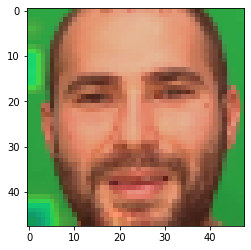

In [0]:
from tensorflow.keras import backend as K
import cv2
from keras.models import Model


def grad_CAM(model, layer, img):
    #plt.imshow(img)
    #plt.show()
    x = np.expand_dims(img, 0)
    preds = model.predict(x)

    print(preds)
    idx = np.argmax(preds[0])
    
    # This is the index entry in the prediction vector
    output = model.output[:, idx]
    print(output.shape)
    # The is the output feature map of the `block5_conv3` layer,
    # the last convolutional layer in VGG16
    last_conv_layer =model.layers[layer]
    print("visualization layer is : ", last_conv_layer.name)

    grads = tf.gradients(output, last_conv_layer.get_output_at(-1))[0]

    # This is a vector of shape (512,), where each entry
    # is the mean intensity of the gradient over a specific feature map channel
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

    # This function allows us to access the values of the quantities we just defined:
    # `pooled_grads` and the output feature map of `block5_conv3`,
    # given a sample image
    #iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.get_output_at(-1)[0]])

    # These are the values of these two quantities, as Numpy arrays,
    # given our sample image of two elephants
    pooled_grads_value, conv_layer_output_value = iterate([x])

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the elephant class
    for i in range(last_conv_layer.output_shape[-1]):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    
    heatmap_raw = heatmap
    
    # We resize the heatmap to have the same size as the original image
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # We convert the heatmap to RGB
    heatmap = np.uint8(255 * heatmap)
    #eatmap = np.uint8(heatmap)

    # We apply the heatmap to the original image
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    plt.matshow(heatmap)
    plt.show()
    # 0.4 here is a heatmap intensity factor
    #superimposed_img = heatmap * 0.1 + img
    opacity = 0.2
    superimposed_img = cv2.addWeighted(heatmap,opacity,img, 1-opacity, 0)
    #plt.imshow(img)
    #plt.show()
    # Save the image to disk
    #cv2.imwrite('elephant_cam.jpg', superimposed_img)
    plt.imshow(superimposed_img)
    return superimposed_img, heatmap_raw

val = randint(0, len(spatialImgs))
img = spatialImgs[val]
sample_name =img.split('/')[-2]
for label in data_labels:
        if label[3] == sample_name:
            emotion = label[4]
            gt_code = label[5]
            break
#print("Ground truth for " ,sample_name , " is : ", emotion, gt_code )

spatialImg = cv2.imread(img)
if (not isinstance(spatialImg, type(none_image))):
  i+=1
  spatialImg = cv2.resize(spatialImg, (48,48))
  spatialImg = cv2.cvtColor(spatialImg, cv2.COLOR_BGR2RGB)
  spatialImg = spatialImg.reshape(48,48,3)

grad_CAM(model, 3, spatialImg)